In [1]:
import torch
from torchvision import transforms
from pathlib import Path
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
MNIST_DIR = "MNISTDataSet"

mnist_dir = Path.cwd().joinpath(MNIST_DIR)
train_filenames = ['/'.join(i.relative_to(Path.cwd()).parts) for i in mnist_dir.joinpath('train').glob('**/*.png')]
test_filenames = ['/'.join(i.relative_to(Path.cwd()).parts) for i in mnist_dir.joinpath('test').glob('**/*.png')]

In [3]:
print(train_filenames[:10], test_filenames[:10])

['MNISTDataSet/train/0.png', 'MNISTDataSet/train/1.png', 'MNISTDataSet/train/10.png', 'MNISTDataSet/train/100.png', 'MNISTDataSet/train/1000.png', 'MNISTDataSet/train/10000.png', 'MNISTDataSet/train/10001.png', 'MNISTDataSet/train/10002.png', 'MNISTDataSet/train/10003.png', 'MNISTDataSet/train/10004.png'] ['MNISTDataSet/test/49000.png', 'MNISTDataSet/test/49001.png', 'MNISTDataSet/test/49002.png', 'MNISTDataSet/test/49003.png', 'MNISTDataSet/test/49004.png', 'MNISTDataSet/test/49005.png', 'MNISTDataSet/test/49006.png', 'MNISTDataSet/test/49007.png', 'MNISTDataSet/test/49008.png', 'MNISTDataSet/test/49009.png']


In [6]:
train_df = pd.read_csv(Path(MNIST_DIR).joinpath('train.csv'), index_col='filename')
test_df = pd.read_csv(Path(MNIST_DIR).joinpath('test.csv'), index_col='filename')

In [67]:
train_df.value_counts()

label
1        5514
7        5105
3        4999
2        4893
9        4871
0        4832
6        4813
4        4777
8        4777
5        4419
dtype: int64

In [7]:
train_df.head()

,label
filename,
0.png,4
1.png,9
2.png,1
3.png,7
4.png,3


In [8]:
test_df.head()

,label
filename,
49000.png,4
49001.png,0
49002.png,9
49003.png,7
49004.png,9


In [56]:
for each in test_df.iterrows():
    print(each)
    break

('49000.png', label    4
Name: 49000.png, dtype: int64)


In [57]:
for each in zip(test_df.index[:10], test_df.label[:10]):
    print(each)

('49000.png', 4)
('49001.png', 0)
('49002.png', 9)
('49003.png', 7)
('49004.png', 9)
('49005.png', 6)
('49006.png', 6)
('49007.png', 7)
('49008.png', 0)
('49009.png', 4)


In [78]:
test_df.iloc[0]

label    4
Name: 49000.png, dtype: int64

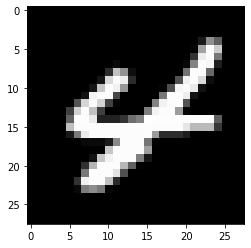

torch.Size([28, 28])

In [30]:
img = cv2.imread(str(mnist_dir.joinpath('train').joinpath('0.png')), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()
torch.Tensor(img).shape


In [68]:
torch.Tensor(img).view(-1, 28, 28).shape

torch.Size([1, 28, 28])

In [70]:
torch.Tensor(img).unsqueeze(0).shape

torch.Size([1, 28, 28])

In [74]:
img2 = cv2.imread(str(mnist_dir.joinpath('train').joinpath('0.png')))
wrong_shape = torch.Tensor(img2)
print(wrong_shape.shape)
right_shape = wrong_shape.swapaxes(0, 2)
print(right_shape.shape)


torch.Size([28, 28, 3])
torch.Size([3, 28, 28])
